##**Analisis Sentimen**
Objective Pada pembahasan ini dilakukan pengambilan data pada media sosial X (twitter) untuk mengetahui tingkat sentimen terhadap biaya UKT yang ramai diperbincangkan. Adapun urutan proses sentimen analisis ini adalah:
1.   Crawling Data X (Twitter) :Proses pengumpulan data dengan hashtag **UKT**
2.   Cleaning Text
3.   Pre-Processing
4.   Terjemahan kata dengan TextBlob
5.   Labeling
6.   Visualisasi
7.   Modeling dengan metode Klasifikasi (Algoritma SVM dan Random Fores)
8.   Testing









###1. **Crawling** Data X (Twitter) :Proses pengumpulan data dengan hashtag **UKT**



In [5]:
#Menyambungkan drive google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Melakukan instalasi library tweepy
!pip install tweepy

**Twitter Auth Token**: Memasukkan token twitter pada akun twitter dengan cara

*   Klik kanan pada web twitter lalu inspect
*   Masuk pada cookies dan copy token twitter



In [ ]:
#Memasukan token Twitter
twitter_auth_token = 'token twitter'

**Melakukan install library yang dibutuhkan untuk crawling**

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,858 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,377 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,129 kB]
Get:13 https://ppa.launchpadcontent.n

**Crawling data twitter** dengan **Tweet Harvest** [v2.6.1] (ingat selalu update versi terbarunya)

In [ ]:
# Crawling Data dengan keyword UKT

filename = 'UKT.csv'
search_keyword = 'UKT lang:id'
limit = 500 #Gunakan limit secara bertahap

!npx --yes tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" -l {limit} --token "6d9efe20d422682bc82d8847efc009b3016b0124"

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

# Check the length of the DataFrame
num_rows = len(df)
print(f"The number of rows in the DataFrame is: {num_rows}")

In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

##2.   **Cleaning Text**



In [6]:
pip install preprocessor

  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=bbb42902fcf17d4cbfd6a80d545f33be4a5f54b205803c7807528a62e3ef877b
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18dbeec4c09309d3edc5461c2a5fffb
Successfully built preprocessor


In [7]:
!pip install twint

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.2/480.2 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33912 sha256=d4b5533b8dd8b6bfa913816b99d35c42c6c5881a879b3ffc20bbddc881dab28f
  Stored in directory: /root/.cache/pip/wheels/48/d2/f5/7a71ea8b6788b85fac82abf4ef84dac03562571f695c3b8f77
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=289393 sha256=5242be9bcda856f5f1ef12ec486b0c6d8a0c00a08882a031cb951cf20c3b2c23
  Stored in directory: /root/.cache/pip/wheel

In [8]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [9]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=0208949cd4f30007915dfebb63b689e41064d511cbd02c9eb141c99815c80e4c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [10]:
pip install translate

In [81]:
pip install textblob

**Menyiapkan Library Analisis Sentimen**

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'whitegrid')
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import preprocessor
from textblob import TextBlob
import twint
import nest_asyncio
nest_asyncio.apply()
from wordcloud import WordCloud,STOPWORDS
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [170]:
#Pemanggilan dataset
data = pd.read_csv("/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/UKT.csv", delimiter=",")
data.shape

(611, 15)

In [171]:
#Melihat isi data
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1795299755243044998,Tue May 28 03:43:11 +0000 2024,7,Pengumuman terkait UKT tahun 2024. https://t.c...,1795299755243044998,https://pbs.twimg.com/media/GOovl8JaYAEw-q5.jpg,NaN,in,Universitas Negeri Semarang,1,0,3,https://x.com/unneskonservasi/status/179529975...,205774715,unneskonservasi
1,1795018802436120682,Mon May 27 09:06:46 +0000 2024,3791,BREAKING: Kemendikbudristek memutuskan untuk m...,1795018802436120682,https://pbs.twimg.com/amplify_video_thumb/1795...,NaN,in,Kutub Selatan,603,231,576,https://x.com/timpenguinnas/status/17950188024...,1457753196269473793,timpenguinnas
2,1795126190669176914,Mon May 27 16:13:30 +0000 2024,348,BPJS Disesuaikan (kelas 3 dihapus) PPN Naik ke...,1795126190669176914,https://pbs.twimg.com/media/GOmRtVtagAAXiaO.jpg,NaN,in,South East Asia,7,22,272,https://x.com/ZAEffendy/status/179512619066917...,129750289,ZAEffendy
3,1795120444959330405,Mon May 27 15:50:40 +0000 2024,8537,Setelah UKT terbitlah Tapera. Ini Indonesia ne...,1795120444959330405,NaN,NaN,in,"Busan, Republic of Korea",205,131,3819,https://x.com/primawansatrio/status/1795120444...,104823513,primawansatrio
4,1795010806720913441,Mon May 27 08:35:00 +0000 2024,5512,PTN! ALERTA ALERTA MEMANGGIL SELURUH REKAN REK...,1795010806720913441,https://pbs.twimg.com/media/GOkjbitaMAAuZBq.jpg,NaN,in,RULES 👉,458,360,593,https://x.com/sbmptnfess/status/17950108067209...,1205629250423779328,sbmptnfess


In [172]:
#melihat type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      611 non-null    int64 
 1   created_at               611 non-null    object
 2   favorite_count           611 non-null    int64 
 3   full_text                611 non-null    object
 4   id_str                   611 non-null    int64 
 5   image_url                449 non-null    object
 6   in_reply_to_screen_name  57 non-null     object
 7   lang                     611 non-null    object
 8   location                 412 non-null    object
 9   quote_count              611 non-null    int64 
 10  reply_count              611 non-null    int64 
 11  retweet_count            611 non-null    int64 
 12  tweet_url                611 non-null    object
 13  user_id_str              611 non-null    int64 
 14  username                 611 non-null    o

In [173]:
#Merubah type data yang tidak sesuai dengan isi data
data['created_at'] = pd.to_datetime(data['created_at']).dt.date
data['created_at'] = pd.to_datetime(data['created_at'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   conversation_id_str      611 non-null    int64         
 1   created_at               611 non-null    datetime64[ns]
 2   favorite_count           611 non-null    int64         
 3   full_text                611 non-null    object        
 4   id_str                   611 non-null    int64         
 5   image_url                449 non-null    object        
 6   in_reply_to_screen_name  57 non-null     object        
 7   lang                     611 non-null    object        
 8   location                 412 non-null    object        
 9   quote_count              611 non-null    int64         
 10  reply_count              611 non-null    int64         
 11  retweet_count            611 non-null    int64         
 12  tweet_url                611 non-nul

<ipython-input-173-fb47c3e65756>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at']).dt.date


In [174]:
#Milihat rentang waktu mengambilan data
data['created_at'].min()

Timestamp('2019-07-17 00:00:00')

In [175]:
data['created_at'].max()

Timestamp('2024-05-28 00:00:00')

Terlihat waktu pengambilan data yaitu 17 Juli 2019 to 28 Mei 2024. total data yang berhasil diambil dalam rentang waktu 5 tahun dengan keyword tweet UKT sebanyak 611

In [176]:
#Melihat komentar setiap tanggal
numberoftweets = data.groupby('created_at').size()
numberoftweets

created_at
2019-07-17     1
2019-12-02     1
2020-03-24     2
2020-07-09     1
2020-07-13     1
              ..
2024-05-24    46
2024-05-25    30
2024-05-26    22
2024-05-27    62
2024-05-28    18
Length: 61, dtype: int64

In [177]:
#Melihat kolom dalan data UKT
data.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [178]:
#Menghapus kolom pada data yang tidak dibutuhkan untuk analisis sentimen
del data['user_id_str']
del data['conversation_id_str']
del data['username']
del data['tweet_url']
data.columns

Index(['created_at', 'favorite_count', 'full_text', 'id_str', 'image_url',
       'in_reply_to_screen_name', 'lang', 'location', 'quote_count',
       'reply_count', 'retweet_count'],
      dtype='object')

In [179]:
#Memilih attribut atau kolom data yang digunakan
data = data[['full_text', 'id_str', 'created_at']]
data

,full_text,id_str,created_at
0,Pengumuman terkait UKT tahun 2024. https://t.c...,1795299755243044998,2024-05-28
1,BREAKING: Kemendikbudristek memutuskan untuk m...,1795018802436120682,2024-05-27
2,BPJS Disesuaikan (kelas 3 dihapus) PPN Naik ke...,1795126190669176914,2024-05-27
3,Setelah UKT terbitlah Tapera. Ini Indonesia ne...,1795120444959330405,2024-05-27
4,PTN! ALERTA ALERTA MEMANGGIL SELURUH REKAN REK...,1795010806720913441,2024-05-27
...,...,...,...
606,UKT Melambung Selain UGM dan UI di PTN Mana La...,1792370434035573106,2024-05-20
607,Ketua Pimpinan Pusat (PP) Muhammadiyah Anwar A...,1792540784702763442,2024-05-20
608,@GilangHamidy LPDP ga urgent sebenernya yang u...,1792467033810161807,2024-05-20
609,Dibaca ya guys Puluhan Camaba Unri Mundur kare...,1792719745785250037,2024-05-21


In [180]:
#Melihat Duplikat atau data yang sama pada dataset
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
606    False
607    False
608    False
609    False
610    False
Length: 611, dtype: bool

In [181]:
#menghapus karakter pada kolom full_text
def clean_twitter_text(text):
    text = re.sub(r'https?://\S+|www\.\S+','',text)
    text = re.sub(r'\$\w*','',text)
    text = re.sub(r'^RT[\s]+','',text)
    text = re.sub(r'https?://[^\s\n\r]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'[^a-zA-Z\s]','', text)
    return text
data['full_text'] = data['full_text'].apply(clean_twitter_text)
data['full_text'].head(10)

0                       Pengumuman terkait UKT tahun  
1    BREAKING Kemendikbudristek memutuskan untuk me...
2    BPJS Disesuaikan kelas  dihapus PPN Naik ke  U...
3    Setelah UKT terbitlah Tapera Ini Indonesia neg...
4    PTN ALERTA ALERTA MEMANGGIL SELURUH REKAN REKA...
5                      mau pindah tapi baru bayar ukt 
6    Orang tua menangis karena mendapati UKT anakny...
7    Mendikbudristek Nadiem Makarim batalkan Kenaik...
8    cm kondisi keluargaku saat ini doain ya spy bs...
9    Dalam  bulan terakhir kebijakan yang sudah dit...
Name: full_text, dtype: object

In [182]:
#merubah text menjadi huruf kecil
data['full_text'] = data['full_text'].str.lower()
data['full_text'].head(10)

0                       pengumuman terkait ukt tahun  
1    breaking kemendikbudristek memutuskan untuk me...
2    bpjs disesuaikan kelas  dihapus ppn naik ke  u...
3    setelah ukt terbitlah tapera ini indonesia neg...
4    ptn alerta alerta memanggil seluruh rekan reka...
5                      mau pindah tapi baru bayar ukt 
6    orang tua menangis karena mendapati ukt anakny...
7    mendikbudristek nadiem makarim batalkan kenaik...
8    cm kondisi keluargaku saat ini doain ya spy bs...
9    dalam  bulan terakhir kebijakan yang sudah dit...
Name: full_text, dtype: object

In [183]:
#menghapus spasi yang berlebihan pada setiap kalimat
def remove_whitespace(text):
    return  " ".join(text.split())
data['full_text']=data['full_text'].apply(remove_whitespace)

data['full_text'].head()

0                         pengumuman terkait ukt tahun
1    breaking kemendikbudristek memutuskan untuk me...
2    bpjs disesuaikan kelas dihapus ppn naik ke ukt...
3    setelah ukt terbitlah tapera ini indonesia neg...
4    ptn alerta alerta memanggil seluruh rekan reka...
Name: full_text, dtype: object

In [185]:
#Melihat total data yang sudah dibersihkan
data.shape

(611, 3)

##**3. Pre-Processing**
Melakukan olah data yang sudah dibersihan kedalam kata yang mudah dipahami

In [186]:
# Load the slang dictionary from CSV
norml = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/slang_indo.csv')
norml.head()

,slang,normal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


In [187]:
# Load the slang dictionary from CSV
norml = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/slang_indo.csv')

# Convert DataFrame to dictionary
slang_dict = pd.Series(norml.normal.values, index=norml.slang).to_dict()

# Function for normalizing text
def normalisasi(str_text):
    words = str_text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    return ' '.join(normalized_words)

# Assuming 'data' is your DataFrame and 'full_text' is the column to be normalized
data['full_text'] = data['full_text'].apply(lambda x: normalisasi(x))


In [188]:
data['full_text'].head()

0                         pengumuman terkait ukt tahun
1    breaking kemendikbudristek memutuskan untuk me...
2    bpjs disesuaikan kelas dihapus ppn naik ke ukt...
3    setelah ukt terbitlah tapera ini indonesia neg...
4    ptn alerta alerta memanggil seluruh rekan reka...
Name: full_text, dtype: object

In [189]:
#Menjalankan library nltk untuk mendownload stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [190]:
#Tokenisasi atau proses pemisahan kata dengan word_token
from nltk import word_tokenize
data['full_text']=data['full_text'].apply(lambda X: word_tokenize(X))
data['full_text'].head()

0                    [pengumuman, terkait, ukt, tahun]
1    [breaking, kemendikbudristek, memutuskan, untu...
2    [bpjs, disesuaikan, kelas, dihapus, ppn, naik,...
3    [setelah, ukt, terbitlah, tapera, ini, indones...
4    [ptn, alerta, alerta, memanggil, seluruh, reka...
Name: full_text, dtype: object

In [192]:
#Stopword Bahasa Indonesia dengan NLTK Stopword
id_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in id_stopwords:
            result.append(token)

    return result

data['full_text'] = data['full_text'].apply(remove_stopwords)
data['full_text'].head()

0                           [pengumuman, terkait, ukt]
1    [breaking, kemendikbudristek, memutuskan, memb...
2    [bpjs, disesuaikan, kelas, dihapus, ppn, ukt, ...
3    [ukt, terbitlah, tapera, indonesia, negara, bu...
4    [ptn, alerta, alerta, memanggil, rekan, rekan,...
Name: full_text, dtype: object

In [193]:
#menhapus tanda baca yang tidak mengandung makna dengan modul RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):

    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

data['full_text']=data['full_text'].apply(remove_punct)
data['full_text'].head()

0                           [pengumuman, terkait, ukt]
1    [breaking, kemendikbudristek, memutuskan, memb...
2    [bpjs, disesuaikan, kelas, dihapus, ppn, ukt, ...
3    [ukt, terbitlah, tapera, indonesia, negara, bu...
4    [ptn, alerta, alerta, memanggil, rekan, rekan,...
Name: full_text, dtype: object

In [194]:
#menghapus kata yang sering muncul
from nltk.probability import FreqDist
from nltk import FreqDist

def frequent_words(dff):

    lst=[]
    for text in dff.values:
        lst+=text[0]
    fdist=FreqDist(lst)
    return fdist.most_common(10)
frequent_words(data)

[('ukt', 721),
 ('kuliah', 188),
 ('mahasiswa', 181),
 ('kenaikan', 134),
 ('mahal', 118),
 ('pendidikan', 110),
 ('bayar', 95),
 ('uang', 84),
 ('nadiem', 81),
 ('biaya', 74)]

In [195]:
freq_words = frequent_words(data)

lst = []
for a,b in freq_words:
    lst.append(b)

def remove_freq_words(text):

    result=[]
    for item in text:
        if item not in lst:
            result.append(item)

    return result

data['full_text']=data['full_text'].apply(remove_freq_words)
data['full_text'].head()

0                           [pengumuman, terkait, ukt]
1    [breaking, kemendikbudristek, memutuskan, memb...
2    [bpjs, disesuaikan, kelas, dihapus, ppn, ukt, ...
3    [ukt, terbitlah, tapera, indonesia, negara, bu...
4    [ptn, alerta, alerta, memanggil, rekan, rekan,...
Name: full_text, dtype: object

In [196]:
#menghapus tanda baca
def remove_tag(text):

    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

data['full_text']=data['full_text'].apply(remove_tag)
data['full_text'].head()

0                               pengumuman terkait ukt
1    breaking kemendikbudristek memutuskan membatal...
2    bpjs disesuaikan kelas dihapus ppn ukt publik ...
3    ukt terbitlah tapera indonesia negara bu giman...
4    ptn alerta alerta memanggil rekan rekan mahasi...
Name: full_text, dtype: object

In [197]:
#Melihat total data
data.shape

(611, 3)

##**Melakukan stemming Data yang sudah terlabelkan**

In [198]:
# Misalnya, kolom teks adalah 'text'
ukt_stem = data['full_text'].tolist()

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [199]:
# Fungsi untuk stemming teks
def stem_text(text):
    return stemmer.stem(text)

In [200]:
# Menerapkan stemming pada setiap tweet
stemmed_tweets = [stem_text(tweet) for tweet in ukt_stem]

# Menambahkan hasil stemming ke dataframe
data['stemmed_text'] = stemmed_tweets

In [201]:
# Menampilkan beberapa hasil stemming
print(data[['full_text', 'stemmed_text']].head())

                                           full_text  \
0                             pengumuman terkait ukt   
1  breaking kemendikbudristek memutuskan membatal...   
2  bpjs disesuaikan kelas dihapus ppn ukt publik ...   
3  ukt terbitlah tapera indonesia negara bu giman...   
4  ptn alerta alerta memanggil rekan rekan mahasi...   

                                        stemmed_text  
0                                      umum kait ukt  
1    breaking kemendikbudristek putus batal naik ukt  
2  bpjs sesuai kelas hapus ppn ukt publik protes ...  
3  ukt terbit tapera indonesia negara bu gimana s...  
4  ptn alerta alerta panggil rekan rekan mahasisw...  


In [202]:
# Menyimpan hasilnya ke file CSV baru
data.to_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/stemmed_ukt.csv', index=False)

## **4. Translate Data twitter yang sudah dibersihkan**

In [ ]:
#Pemanggilan data yang sudah distemming
#tweets = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/stemmed_ukt.csv##')
#tweets.shape

In [203]:
from googletrans import Translator
# Membuat objek Translator
translator = Translator()

In [204]:
def translate_text(text):
    try:
        # Menerjemahkan teks
        translated = translator.translate(text, src='id', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating text: {text}")
        return text

# Menerjemahkan kolom 'Tweet' dari dataset
data['Tweet_Translated'] = data['full_text'].apply(translate_text)
data['Tweet_Translated'].head()

# Menampilkan beberapa baris data untuk melihat hasilnya
#print(data[['full_text', 'Tweet_Translated']].head())

0                          Announcement related to UKT
1    Breaking Kemendikbudristek decided to cancel t...
2    BPJS is adjusted for the class to be deleted b...
3    UKT is published by tapera indonesia, how abou...
4    PTN ALITA ALrta CALLED FMINUAL STUDENTS OF PRO...
Name: Tweet_Translated, dtype: object

In [205]:
#merubah text menjadi huruf kecil
data['Tweet_Translated'] = data['Tweet_Translated'].str.lower()
data['Tweet_Translated'].head(10)

0                          announcement related to ukt
1    breaking kemendikbudristek decided to cancel t...
2    bpjs is adjusted for the class to be deleted b...
3    ukt is published by tapera indonesia, how abou...
4    ptn alita alrta called fminual students of pro...
5                                       moving ukt pay
6    parents cry find their children according to d...
7    minister of education and culture nadiem makar...
8           my family's condition pray for january ukt
9    the policy signed by the ministerial level was...
Name: Tweet_Translated, dtype: object

In [206]:
#Melihat total data
data.shape

(611, 5)

In [207]:
#Melihat isi data setelah dilakukan terjemahan kedalam bahasa inggris
data.head()

,full_text,id_str,created_at,stemmed_text,Tweet_Translated
0,pengumuman terkait ukt,1795299755243044998,2024-05-28,umum kait ukt,announcement related to ukt
1,breaking kemendikbudristek memutuskan membatal...,1795018802436120682,2024-05-27,breaking kemendikbudristek putus batal naik ukt,breaking kemendikbudristek decided to cancel t...
2,bpjs disesuaikan kelas dihapus ppn ukt publik ...,1795126190669176914,2024-05-27,bpjs sesuai kelas hapus ppn ukt publik protes ...,bpjs is adjusted for the class to be deleted b...
3,ukt terbitlah tapera indonesia negara bu giman...,1795120444959330405,2024-05-27,ukt terbit tapera indonesia negara bu gimana s...,"ukt is published by tapera indonesia, how abou..."
4,ptn alerta alerta memanggil rekan rekan mahasi...,1795010806720913441,2024-05-27,ptn alerta alerta panggil rekan rekan mahasisw...,ptn alita alrta called fminual students of pro...


In [208]:
#Menyimpan data set yang sudah ditranslate kedalam bahasa inggris
data.to_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/translated_ukt.csv', index=False)

## **5. Labeling data yang sudah diterjemahkan dengan TextBlob**
Pada labeling data ini sentimen yang digunakan adalah sentimen **Negatif** dan **Positif**.

In [209]:
#Pemanggilan data yang sudah distemming
tweets = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/translated_ukt.csv')
tweets.shape

(611, 5)

In [210]:
#Melihat isi data
tweets.head()

,full_text,id_str,created_at,stemmed_text,Tweet_Translated
0,pengumuman terkait ukt,1795299755243044998,2024-05-28,umum kait ukt,announcement related to ukt
1,breaking kemendikbudristek memutuskan membatal...,1795018802436120682,2024-05-27,breaking kemendikbudristek putus batal naik ukt,breaking kemendikbudristek decided to cancel t...
2,bpjs disesuaikan kelas dihapus ppn ukt publik ...,1795126190669176914,2024-05-27,bpjs sesuai kelas hapus ppn ukt publik protes ...,bpjs is adjusted for the class to be deleted b...
3,ukt terbitlah tapera indonesia negara bu giman...,1795120444959330405,2024-05-27,ukt terbit tapera indonesia negara bu gimana s...,"ukt is published by tapera indonesia, how abou..."
4,ptn alerta alerta memanggil rekan rekan mahasi...,1795010806720913441,2024-05-27,ptn alerta alerta panggil rekan rekan mahasisw...,ptn alita alrta called fminual students of pro...


In [211]:
#merubah text menjadi huruf kecil
tweets['Tweet_Translated'] = tweets['Tweet_Translated'].str.lower()
tweets['Tweet_Translated'].head(10)

0                          announcement related to ukt
1    breaking kemendikbudristek decided to cancel t...
2    bpjs is adjusted for the class to be deleted b...
3    ukt is published by tapera indonesia, how abou...
4    ptn alita alrta called fminual students of pro...
5                                       moving ukt pay
6    parents cry find their children according to d...
7    minister of education and culture nadiem makar...
8           my family's condition pray for january ukt
9    the policy signed by the ministerial level was...
Name: Tweet_Translated, dtype: object

In [212]:
#Tokenisasi atau proses pemisahan kata
from nltk import word_tokenize
tweets['Tweet_Translated']= tweets['Tweet_Translated'].apply(lambda X: word_tokenize(X))
tweets['Tweet_Translated'].head()

0                     [announcement, related, to, ukt]
1    [breaking, kemendikbudristek, decided, to, can...
2    [bpjs, is, adjusted, for, the, class, to, be, ...
3    [ukt, is, published, by, tapera, indonesia, ,,...
4    [ptn, alita, alrta, called, fminual, students,...
Name: Tweet_Translated, dtype: object

In [213]:
from textblob import TextBlob

data = tweets['Tweet_Translated'].tolist()
# Fungsi untuk melakukan analisis sentimen dengan posit dan Negatif
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    #Set threshold untuk klasifikasi sentimen
    if analysis.sentiment.polarity > 0:
        return 'positif'
    else:
        return 'negatif'

# Predict sentiment for each cleaned tweet
tweets['sentiment'] = tweets['Tweet_Translated'].apply(analyze_sentiment)

In [214]:
print(tweets[['full_text', 'Tweet_Translated', 'sentiment']].head())

                                           full_text  \
0                             pengumuman terkait ukt   
1  breaking kemendikbudristek memutuskan membatal...   
2  bpjs disesuaikan kelas dihapus ppn ukt publik ...   
3  ukt terbitlah tapera indonesia negara bu giman...   
4  ptn alerta alerta memanggil rekan rekan mahasi...   

                                    Tweet_Translated sentiment  
0                   [announcement, related, to, ukt]   negatif  
1  [breaking, kemendikbudristek, decided, to, can...   negatif  
2  [bpjs, is, adjusted, for, the, class, to, be, ...   negatif  
3  [ukt, is, published, by, tapera, indonesia, ,,...   negatif  
4  [ptn, alita, alrta, called, fminual, students,...   negatif  


In [215]:
print(tweets['sentiment'].value_counts())

sentiment
negatif    438
positif    173
Name: count, dtype: int64


In [216]:
#Melihat isi data yang sudah terlabel
tweets.head()

,full_text,id_str,created_at,stemmed_text,Tweet_Translated,sentiment
0,pengumuman terkait ukt,1795299755243044998,2024-05-28,umum kait ukt,"[announcement, related, to, ukt]",negatif
1,breaking kemendikbudristek memutuskan membatal...,1795018802436120682,2024-05-27,breaking kemendikbudristek putus batal naik ukt,"[breaking, kemendikbudristek, decided, to, can...",negatif
2,bpjs disesuaikan kelas dihapus ppn ukt publik ...,1795126190669176914,2024-05-27,bpjs sesuai kelas hapus ppn ukt publik protes ...,"[bpjs, is, adjusted, for, the, class, to, be, ...",negatif
3,ukt terbitlah tapera indonesia negara bu giman...,1795120444959330405,2024-05-27,ukt terbit tapera indonesia negara bu gimana s...,"[ukt, is, published, by, tapera, indonesia, ,,...",negatif
4,ptn alerta alerta memanggil rekan rekan mahasi...,1795010806720913441,2024-05-27,ptn alerta alerta panggil rekan rekan mahasisw...,"[ptn, alita, alrta, called, fminual, students,...",negatif


In [218]:
#Menyimpan data set yang sudah ditranslate kedalam bahasa inggris
tweets.to_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/sentiment_ukt.csv', index=False)

## **6. Visualisasi data Twitter UKT 2024**

In [219]:
#Pemanggilan data
df_ukt = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/sentiment_ukt.csv')
df_ukt.shape

(611, 6)

In [220]:
df_ukt.head()

,full_text,id_str,created_at,stemmed_text,Tweet_Translated,sentiment
0,pengumuman terkait ukt,1795299755243044998,2024-05-28,umum kait ukt,"['announcement', 'related', 'to', 'ukt']",negatif
1,breaking kemendikbudristek memutuskan membatal...,1795018802436120682,2024-05-27,breaking kemendikbudristek putus batal naik ukt,"['breaking', 'kemendikbudristek', 'decided', '...",negatif
2,bpjs disesuaikan kelas dihapus ppn ukt publik ...,1795126190669176914,2024-05-27,bpjs sesuai kelas hapus ppn ukt publik protes ...,"['bpjs', 'is', 'adjusted', 'for', 'the', 'clas...",negatif
3,ukt terbitlah tapera indonesia negara bu giman...,1795120444959330405,2024-05-27,ukt terbit tapera indonesia negara bu gimana s...,"['ukt', 'is', 'published', 'by', 'tapera', 'in...",negatif
4,ptn alerta alerta memanggil rekan rekan mahasi...,1795010806720913441,2024-05-27,ptn alerta alerta panggil rekan rekan mahasisw...,"['ptn', 'alita', 'alrta', 'called', 'fminual',...",negatif


In [221]:
print(df_ukt['sentiment'].value_counts())

sentiment
negatif    438
positif    173
Name: count, dtype: int64


In [223]:
#Memilih attribut atau kolom data yang digunakan
df = df_ukt[['stemmed_text', 'sentiment']]
df.head(10)

,stemmed_text,sentiment
0,umum kait ukt,negatif
1,breaking kemendikbudristek putus batal naik ukt,negatif
2,bpjs sesuai kelas hapus ppn ukt publik protes ...,negatif
3,ukt terbit tapera indonesia negara bu gimana s...,negatif
4,ptn alerta alerta panggil rekan rekan mahasisw...,negatif
5,pindah bayar ukt,negatif
6,orang tua menang dapat ukt anak sesuai dapat s...,negatif
7,mendikbudristek nadiem makarim batal naik ukt,negatif
8,kondisi keluarga doain ya bayar ukt januari,negatif
9,bijak teken level menteri batal viral ribut at...,positif


<ipython-input-224-46bfff48003e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette="Set2", order=["negatif", "positif"])


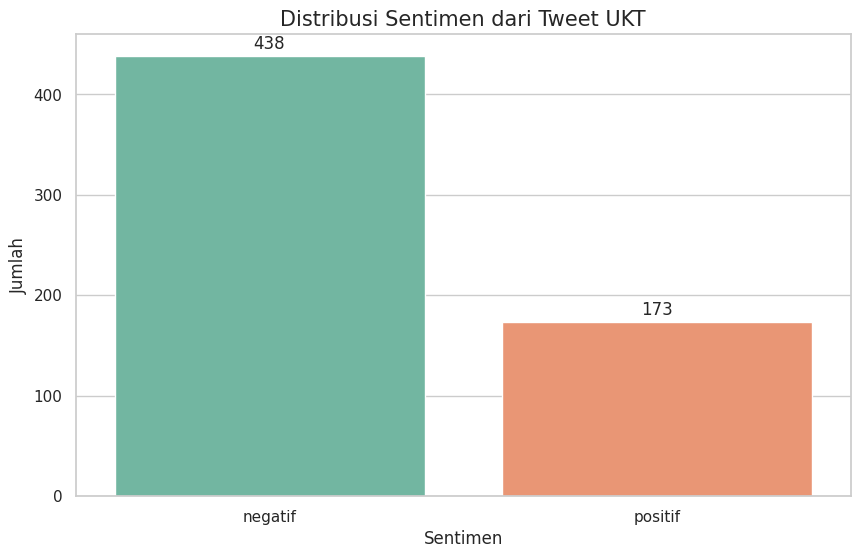

sentiment
negatif    438
positif    173
Name: count, dtype: int64


In [224]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=df, palette="Set2", order=["negatif", "positif"])

# Menambahkan judul dan label sumbu
plt.title('Distribusi Sentimen dari Tweet UKT', fontsize=15)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Menampilkan plot
plt.show()

print(df['sentiment'].value_counts())

**Membuat WordCloud dari kata-kata Negatif dan Positif**

In [225]:
# Misalnya, kolom teks adalah 'text' dan kolom sentimen adalah 'sentiment'
positive_tweets = df[df['sentiment'] == 'positif']['stemmed_text']
negative_tweets = df[df['sentiment'] == 'negatif']['stemmed_text']

# Membuat WordCloud untuk setiap sentimen
def generate_wordcloud(sentiment_tweets, title):
    # Menggabungkan semua tweet menjadi satu teks
    text = ' '.join(sentiment_tweets)
    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

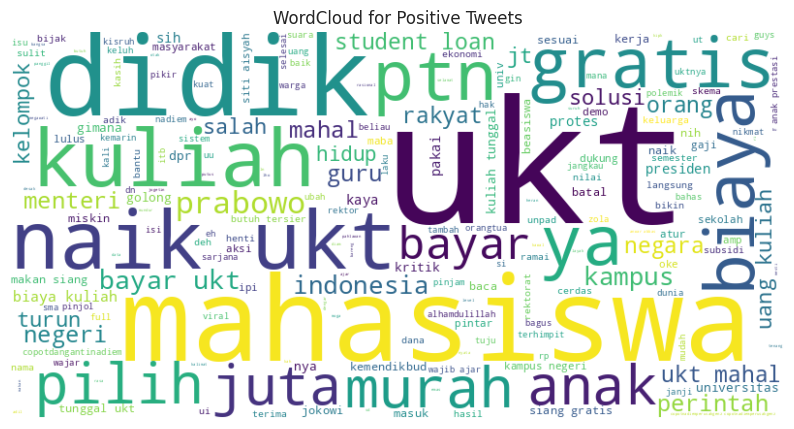

In [226]:
# Print WordCloud sentimen Positif
generate_wordcloud(positive_tweets, 'WordCloud for Positive Tweets')

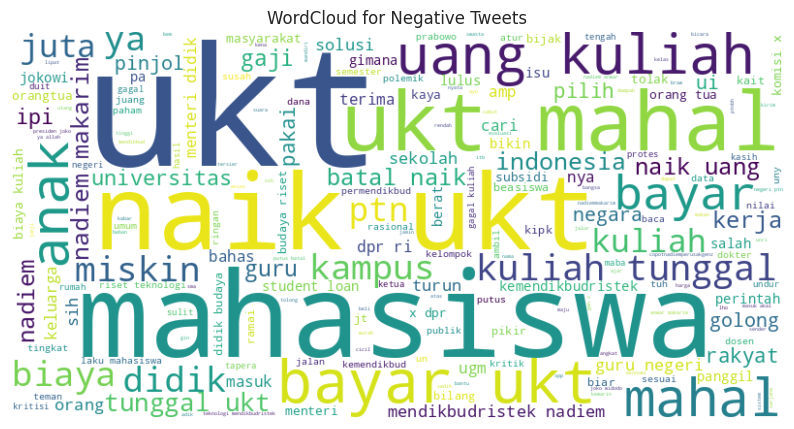

In [227]:
# Print WordCloud sentimen Positif
generate_wordcloud(negative_tweets, 'WordCloud for Negative Tweets')

## **7. Modeling dengan metode Klasifikasi (Algoritma SVM dan Random Fores)**

In [228]:
#Merubah Label sentimen menjadi numerik 0 (Negatif) dan 1 (Positif)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.shape

<ipython-input-228-168842c530b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = label_encoder.fit_transform(df['sentiment'])


(611, 2)

In [229]:
print(df['sentiment'].value_counts())

sentiment
0    438
1    173
Name: count, dtype: int64


In [230]:
#Melakukan Pemisahan Data
x = df.stemmed_text
y = df.sentiment

print(len(x), len(y))

611 611


In [231]:
#Melakukan pembagian data Training dan Testing dengan 80% (0.8) data Training dan 20% (0.2) data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

458 458
153 153


**Melakuan Vektorisasi data sentimen ukt dengan TF_IDF**

In [232]:
# instantiate the vectorizer
vectorizer_Tfidf = TfidfVectorizer()

#applying tf idf to training data
X_train_tf = vectorizer_Tfidf.fit_transform(x_train)

#applying tf idf to training data
#X_train_tf = vectorizer_Tfidf.transform(x_train)

#applying tf idf to testing data
X_test_tf = vectorizer_Tfidf.transform(x_test)

In [233]:
tfidf_df = pd.DataFrame(X_train_tf.toarray(), columns=vectorizer_Tfidf.get_feature_names_out())

# Menampilkan beberapa hasil TF-IDF
tfidf_df.head()

,aaaaa,abah,abandoned,abbas,abbasiyah,abdi,abis,about,abt,abusive,...,yuk,yusuf,zaman,zara,zenrs,zizan,zola,zonabu,zonasi,zonauang
0,0.0,0.0,0.0,0.0,0.0,0.491443,0.0,0.0,0.163814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Menyeimbangkan data label dengan metode Imbalance algoritma SMOTE**

In [234]:
#Proses menyeimbangkan dataset
sm = SMOTE(random_state=42)
x_train_resempled, y_train_resempled = sm.fit_resample(X_train_tf.toarray(), y_train)

After Data label sentimen sentiment
0    332
1    332
Name: count, dtype: int64


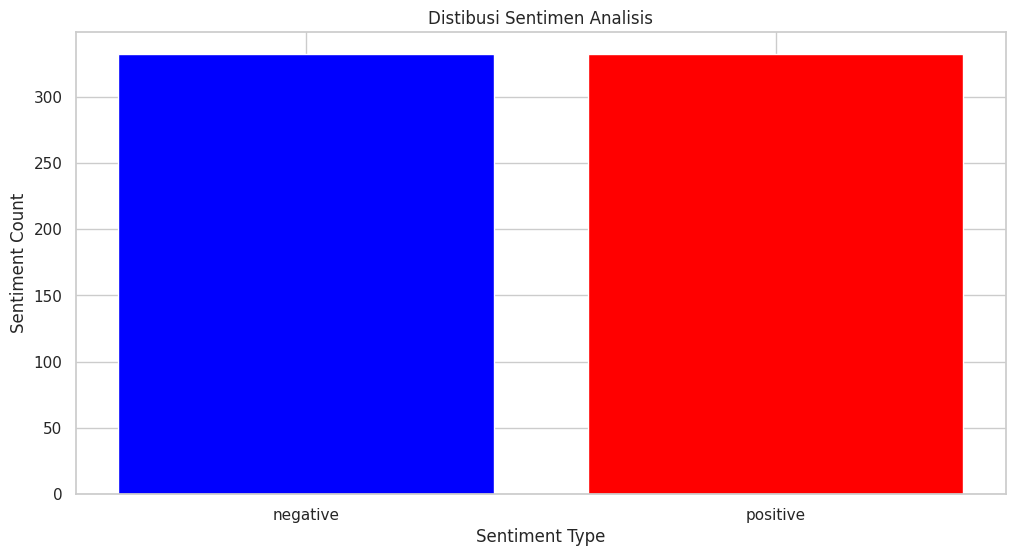

In [235]:
#Melihat Visualisasi menyebaran data setelah dilakukan penyeimbang data
sentimen_counter = y_train_resempled.value_counts()
index = [1,2]
plt.figure(1,figsize=(12,6))
#sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.bar(index,sentimen_counter,color=['blue', 'red'])
plt.xticks(index,['negative','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Distibusi Sentimen Analisis')
print ('After Data label sentimen',sentimen_counter)

**Modeling Algoritma Random Forest**

In [236]:
#Random Forest
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(x_train_resempled, y_train_resempled)
pred_Rf = RF_classifier.predict(X_test_tf )

#Melihat Hasil Akurasi Data UKT
accuracy_Rf = accuracy_score(y_test,pred_Rf)
print (f"Random Forest Accuracy: {accuracy_Rf:.2f}")

Random Forest Accuracy: 0.74


In [237]:
#Validasi data dengan Cross validation 10 k-fold (cv)
scores = cross_val_score(RF_classifier, x_train_resempled, y_train_resempled, scoring='accuracy', cv=10)
print("Accuracy random Forest: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), scores))

Accuracy random Forest: 0.74 (+/- 0.11) [[0.71641791 0.55223881 0.59701493 0.65671642 0.81818182 0.83333333
 0.8030303  0.93939394 0.75757576 0.72727273]]


In [238]:
#Melihat Confusion Matrix
print(classification_report(y_test, pred_Rf))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       106
           1       0.68      0.28      0.39        47

    accuracy                           0.74       153
   macro avg       0.72      0.61      0.61       153
weighted avg       0.73      0.74      0.70       153



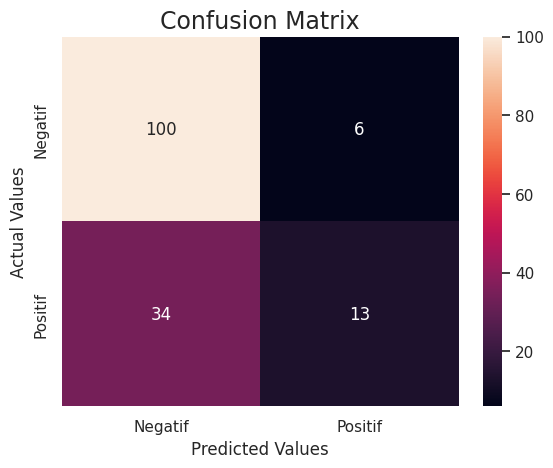

In [239]:
#Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, pred_Rf, labels=RF_classifier.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_classifier.classes_)
#color = 'white'
#disp.plot()
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Negatif','Positif'],
            yticklabels=['Negatif','Positif'])
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Modeling Algoritma Support Vektor Machine (SVM)**

In [240]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train_resempled, y_train_resempled)

#predicting output for test data
pred_SVM = svc.predict(X_test_tf.toarray())

#Melihat Hasil Akurasi Data UKT
accuracy_SVM = accuracy_score(y_test,pred_SVM)
print (f"SVM Accuracy: {accuracy_SVM:.2f}")

SVM Accuracy: 0.70


In [241]:
#Validasi data dengan Cross validation 10 k-fold (cv)
scores = cross_val_score(svc, x_train_resempled, y_train_resempled, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), scores))

Accuracy: 0.90 (+/- 0.04) [[0.88059701 0.82089552 0.89552239 0.85074627 0.98484848 0.89393939
 0.90909091 0.92424242 0.89393939 0.93939394]]


In [242]:
#Melihat Confusion Matrix
print(classification_report(y_test, pred_SVM))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       106
           1       0.51      0.38      0.44        47

    accuracy                           0.70       153
   macro avg       0.63      0.61      0.62       153
weighted avg       0.68      0.70      0.69       153



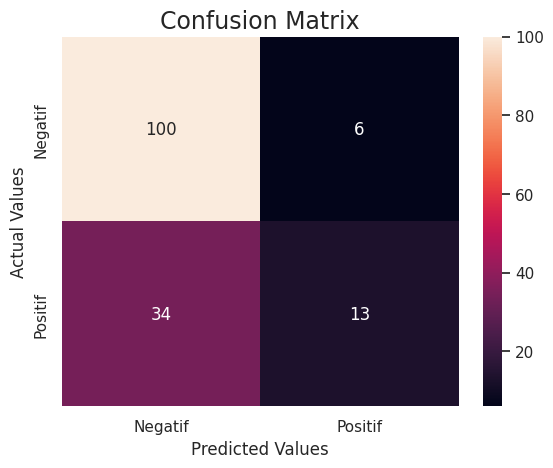

In [243]:
#Validasi data dengan Cross validation 10 k-fold (cv)
m = confusion_matrix(y_test, pred_SVM, labels=svc.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_classifier.classes_)
#color = 'white'
#disp.plot()
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Negatif','Positif'],
            yticklabels=['Negatif','Positif'])
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [244]:
from nltk.classify.util import accuracy as nltk_accuracy

# Test the classifiers with a new sentence
new_sentence = "polemik biaya ukt guru negeri mahal universitas muhammadiyah maumere boleh bayar uang kuliah hasil bumi pisang ikan laut tangkap newsupdate update news videonews"
preprocessed_sentence = stem_text(new_sentence)
vectorized_sentence = vectorizer_Tfidf.transform([preprocessed_sentence])

rf_classification = RF_classifier.predict(vectorized_sentence)

print(f"Random Forest Sentiment of '{new_sentence}': {rf_classification[0]}")

Random Forest Sentiment of 'polemik biaya ukt guru negeri mahal universitas muhammadiyah maumere boleh bayar uang kuliah hasil bumi pisang ikan laut tangkap newsupdate update news videonews': 0


##**Meodelling dengan metode LSTM**

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.utils import to_categorical

In [ ]:
#Pemanggilan data
df_ukt = pd.read_csv('/content/drive/MyDrive/Data Mining/Analisis Sentimen Twitter/stemmed_ukt2.csv')
df_ukt.shape

(611, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
df.shape

(611, 2)

In [ ]:
print(df['sentiment'].value_counts())

sentiment
0    434
1    177
Name: count, dtype: int64


In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['stemmed_text'].values)
x = tokenizer.texts_to_sequences(df['stemmed_text'].values)
x = pad_sequences(x)

In [ ]:
#Membagi Data Latih dan Uji
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#Proses menyeimbangkan dataset
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

y_train_sm = to_categorical(y_train_sm, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
print ('After Data label sentimen',sentimen_counter)

After Data label sentimen sentiment
0    343
1    343
Name: count, dtype: int64


In [ ]:
# Membangun Model LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Melatih Model
model.fit(x_train_sm, y_train_sm, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
21/21 - 6s - loss: 0.2025 - accuracy: 0.9262 - val_loss: 0.9178 - val_accuracy: 0.6013 - 6s/epoch - 266ms/step
Epoch 2/10
21/21 - 7s - loss: 0.0847 - accuracy: 0.9754 - val_loss: 1.0354 - val_accuracy: 0.6601 - 7s/epoch - 335ms/step
Epoch 3/10
21/21 - 3s - loss: 0.0642 - accuracy: 0.9815 - val_loss: 1.0651 - val_accuracy: 0.6536 - 3s/epoch - 152ms/step
Epoch 4/10
21/21 - 2s - loss: 0.0252 - accuracy: 0.9954 - val_loss: 1.4138 - val_accuracy: 0.6144 - 2s/epoch - 101ms/step
Epoch 5/10
21/21 - 2s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.9167 - val_accuracy: 0.5556 - 2s/epoch - 103ms/step
Epoch 6/10
21/21 - 3s - loss: 0.0110 - accuracy: 0.9969 - val_loss: 1.6978 - val_accuracy: 0.6078 - 3s/epoch - 124ms/step
Epoch 7/10
21/21 - 4s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.7611 - val_accuracy: 0.6013 - 4s/epoch - 167ms/step
Epoch 8/10
21/21 - 3s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 1.7218 - val_accuracy: 0.6340 - 3s/epoch - 140ms/step
Epoch 9/10
21/21 - 2s - 

In [ ]:
# Evaluasi Model
score, acc = model.evaluate(x_test, y_test, verbose=2, batch_size=32)
print(f"Test accuracy: {acc}")

5/5 - 0s - loss: 1.7748 - accuracy: 0.6209 - 162ms/epoch - 32ms/step
Test accuracy: 0.6209150552749634
